In [1]:
!nvidia-smi

Tue Dec 23 09:21:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
import os

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image

In [6]:
HOME = os.getcwd()
print(HOME)

/content


In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TcaLNZLqMGI3J22Lccon")
project = rf.workspace("kickhands").project("rock-paper-scissor-if71v")
version = project.version(2)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov12 in progress : 85.0%
Version export complete for yolov12 format



Extracting Dataset Version Zip to rock-paper-scissor-2 in yolov12:: 100%|██████████| 806/806 [00:00<00:00, 3943.60it/s]


In [11]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [12]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml


In [13]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['paper', 'rock', 'scissor']

roboflow:
  workspace: kickhands
test: ../test/images
train: ../train/images
val: ../valid/images


In [14]:
model = YOLO("yolo12s.yaml")

In [15]:
results = model.train(data=f'{dataset.location}/data.yaml',epochs = 100)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/rock-paper-scissor-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

In [16]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	      train_batch1.jpg
BoxF1_curve.png			 results.csv	      train_batch2.jpg
BoxP_curve.png			 results.png	      val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch0_pred.jpg
BoxR_curve.png			 train_batch1980.jpg  val_batch1_labels.jpg
confusion_matrix_normalized.png  train_batch1981.jpg  val_batch1_pred.jpg
confusion_matrix.png		 train_batch1982.jpg  weights


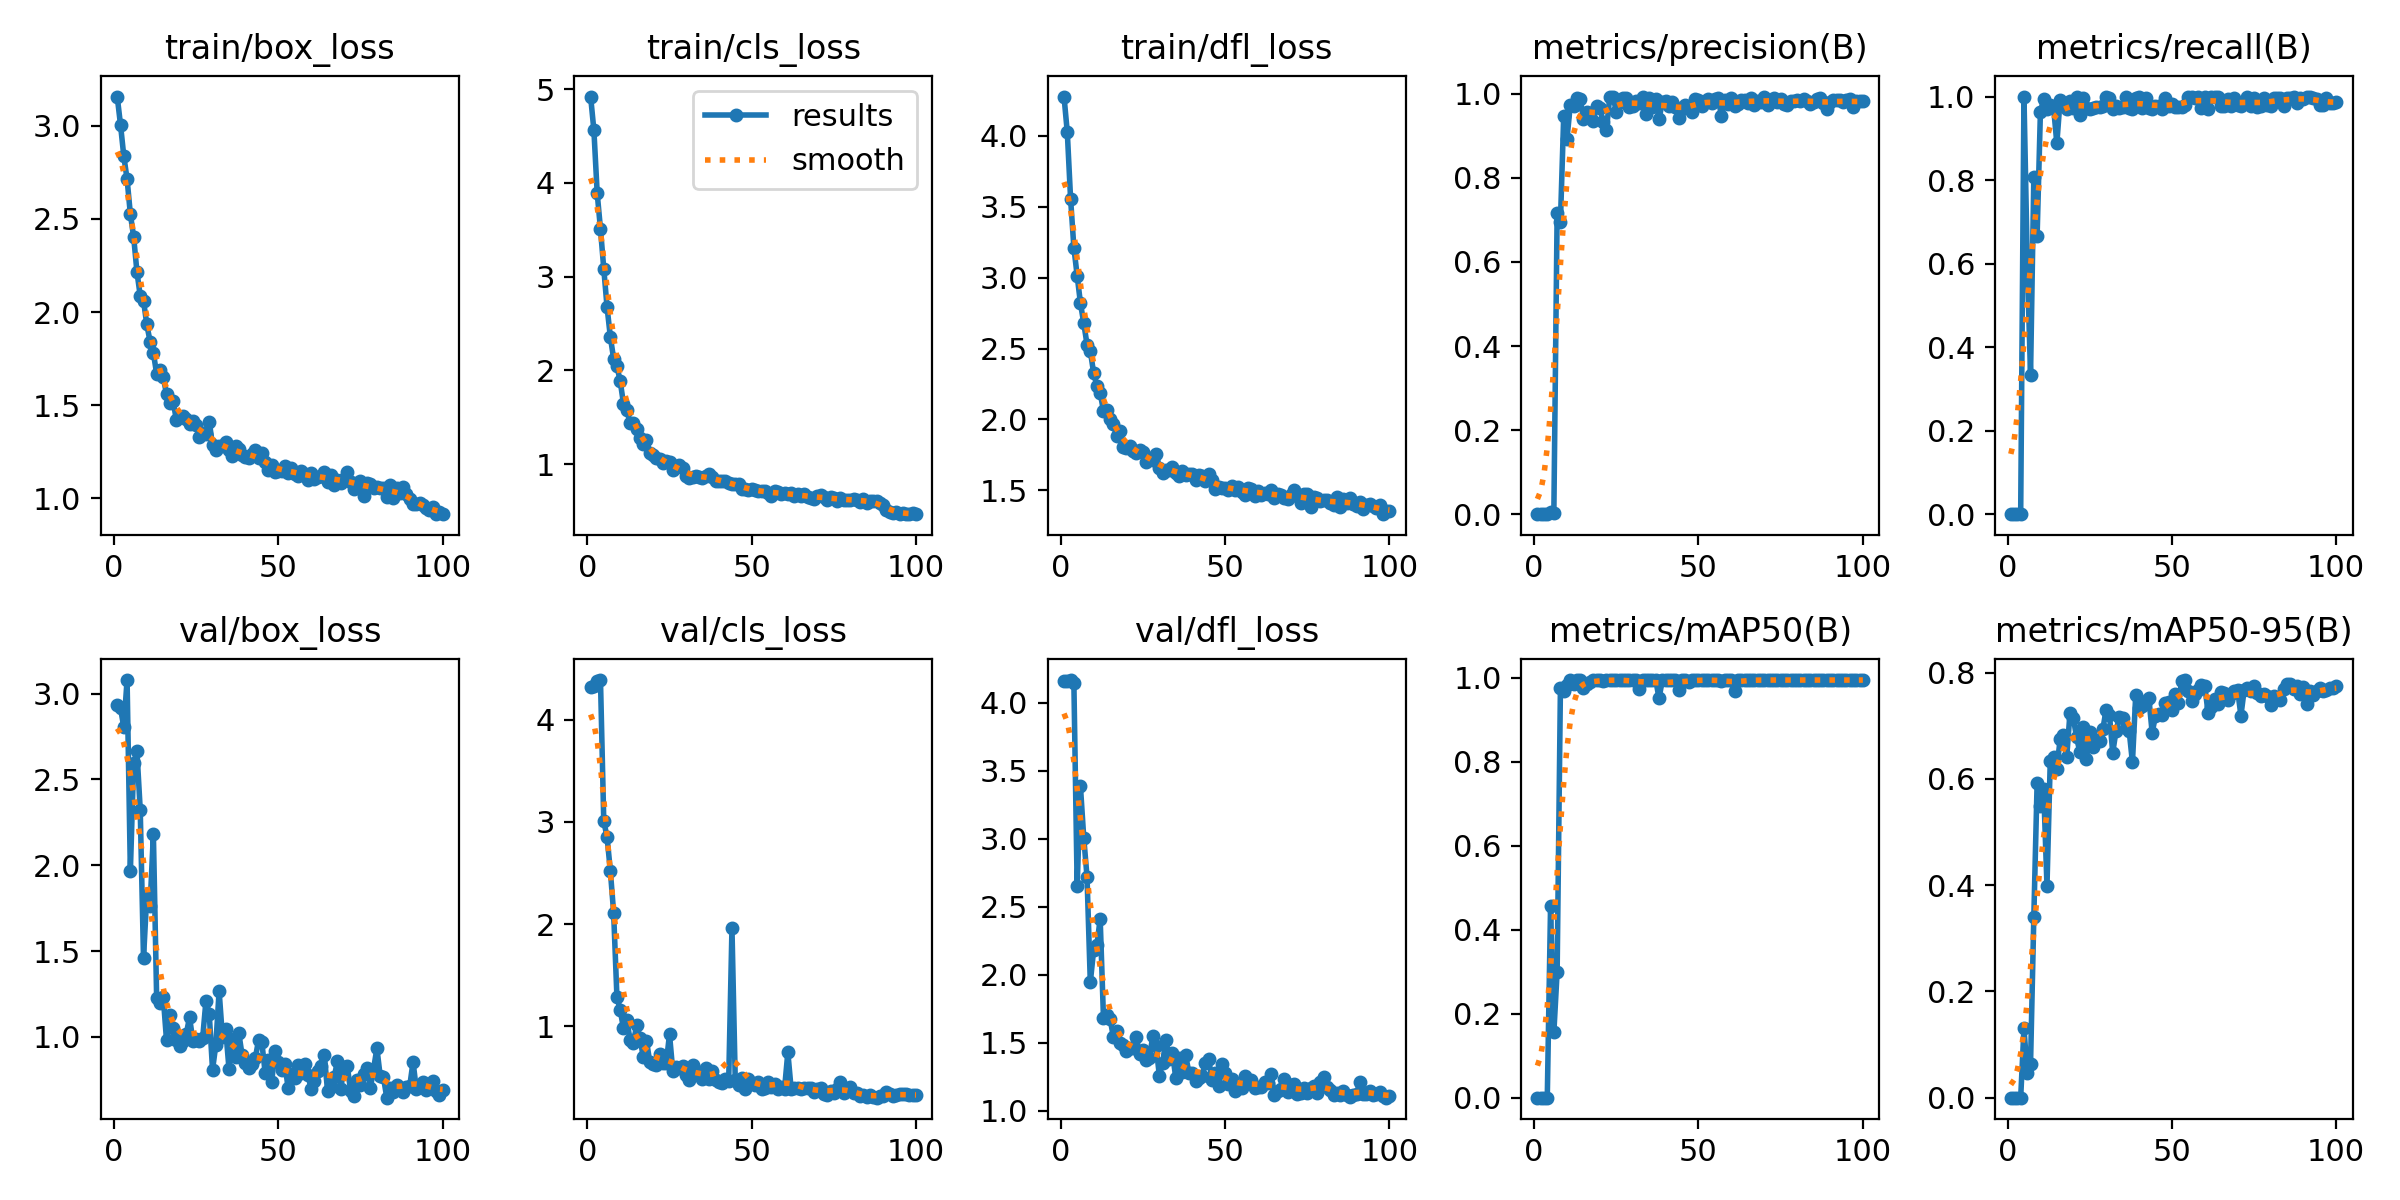

In [18]:
Image(filename=f'{HOME}/runs/detect/train/results.png',width=1000)

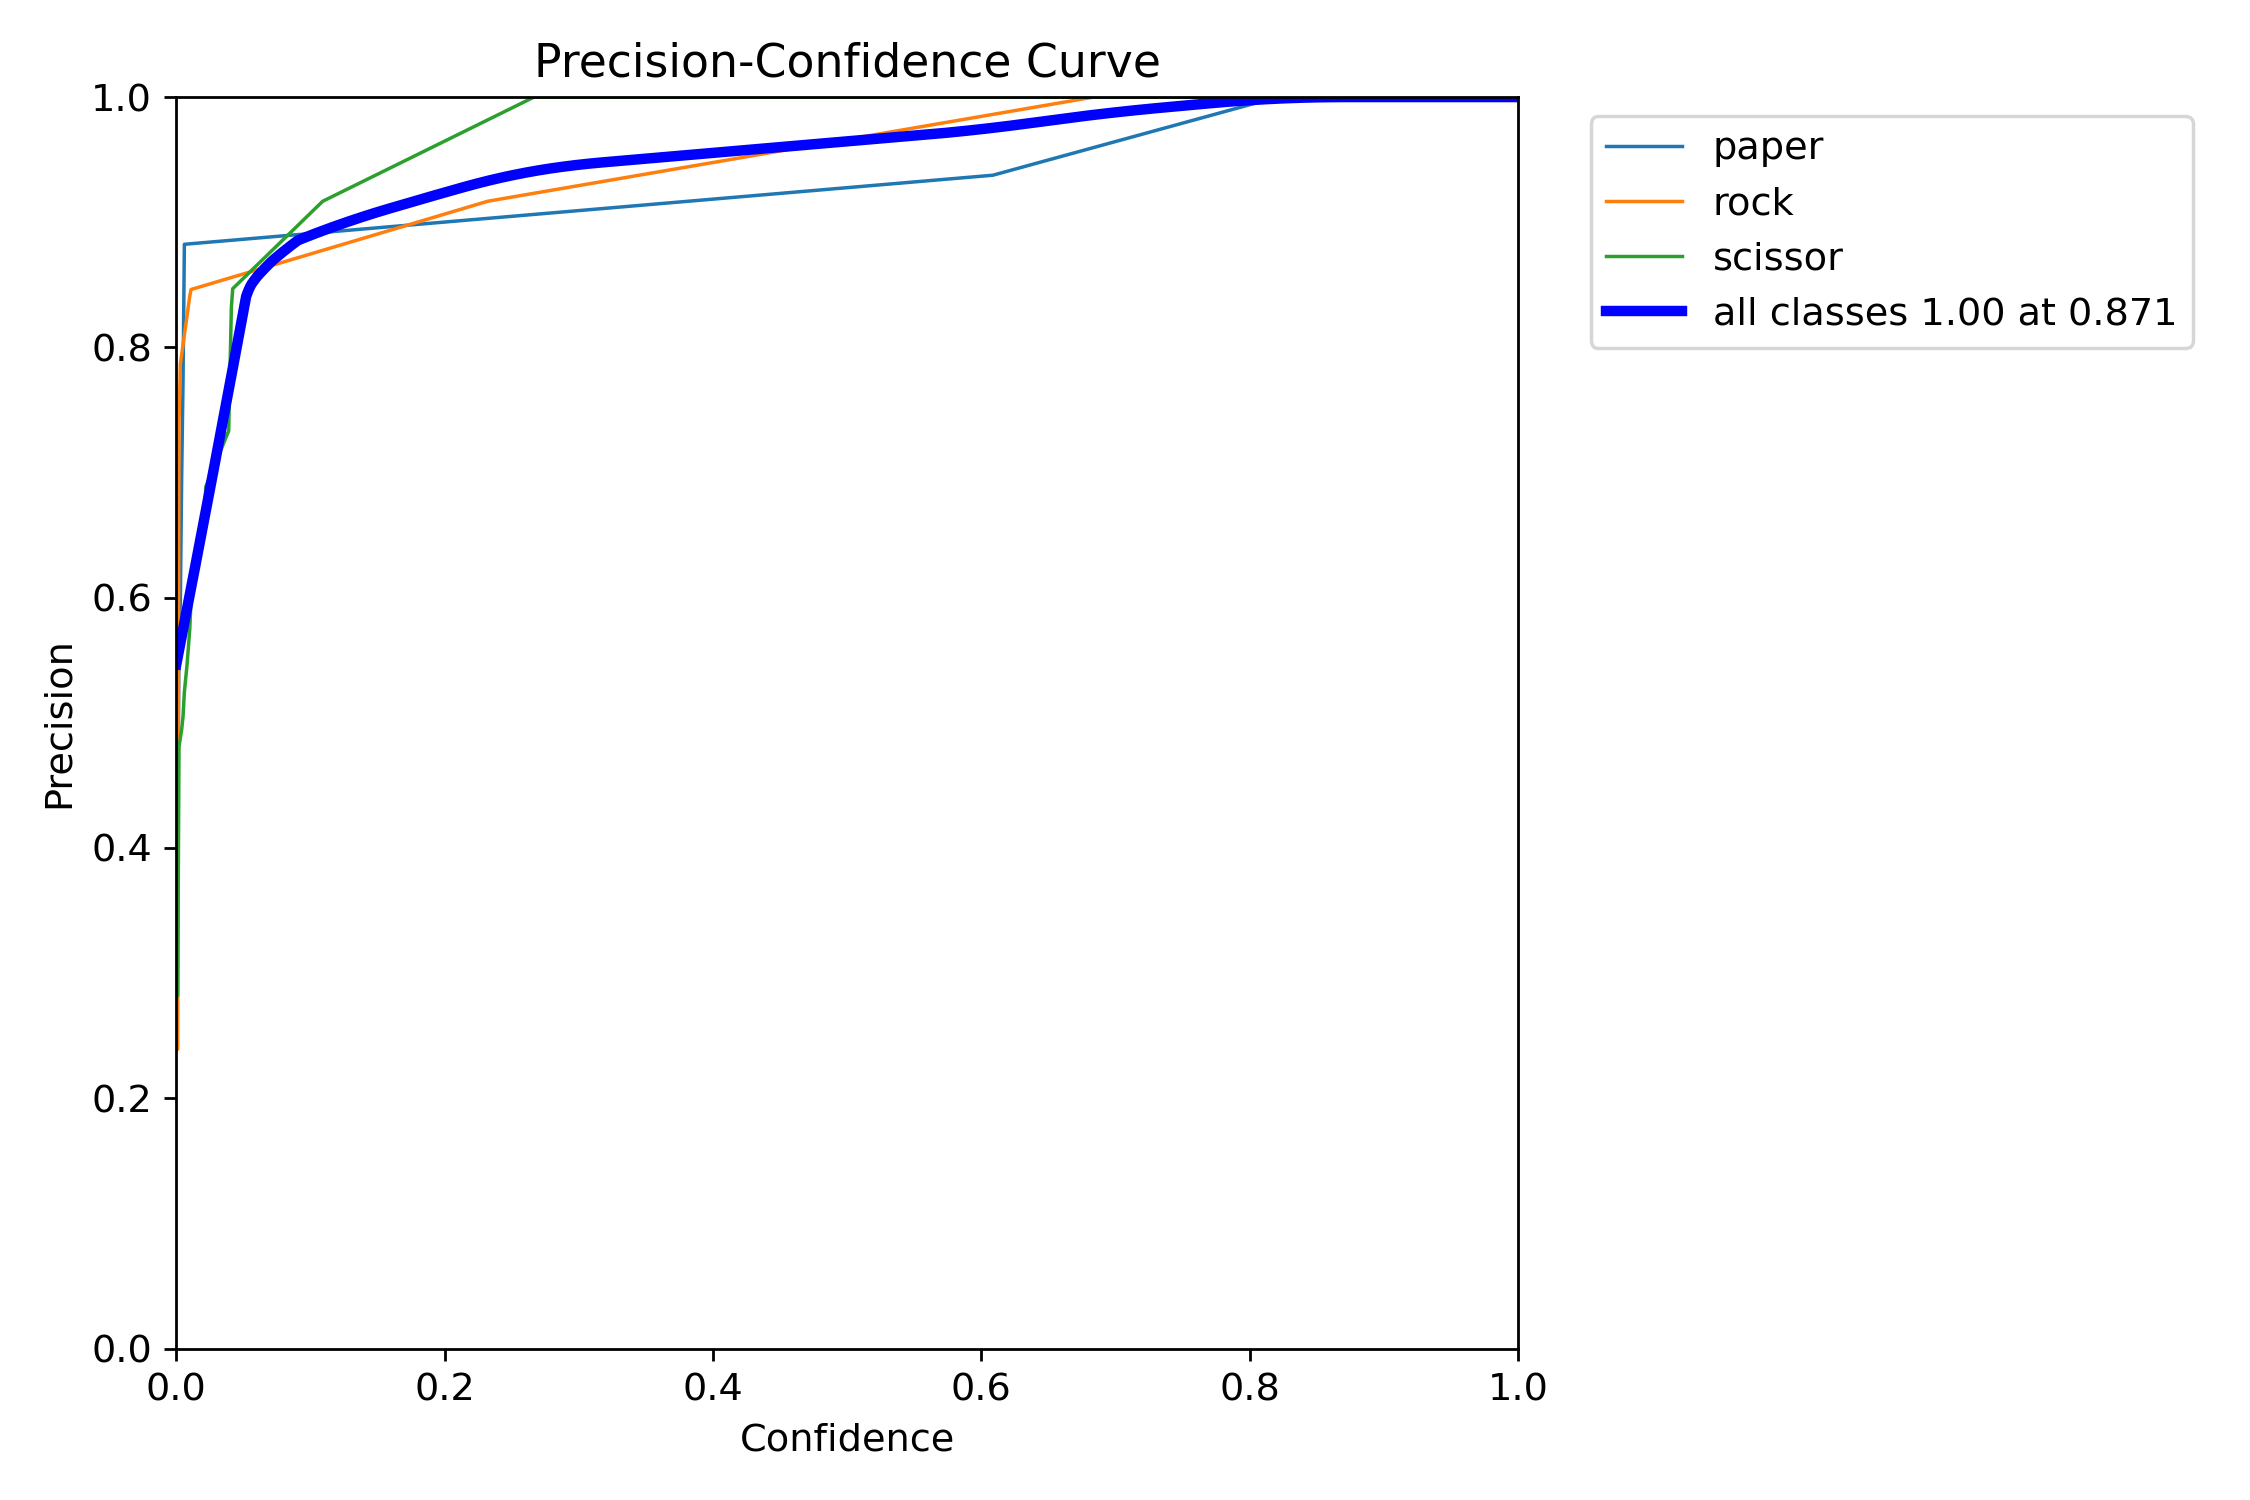

In [19]:
Image(filename=f'{HOME}/runs/detect/train/BoxP_curve.png',width=1000)

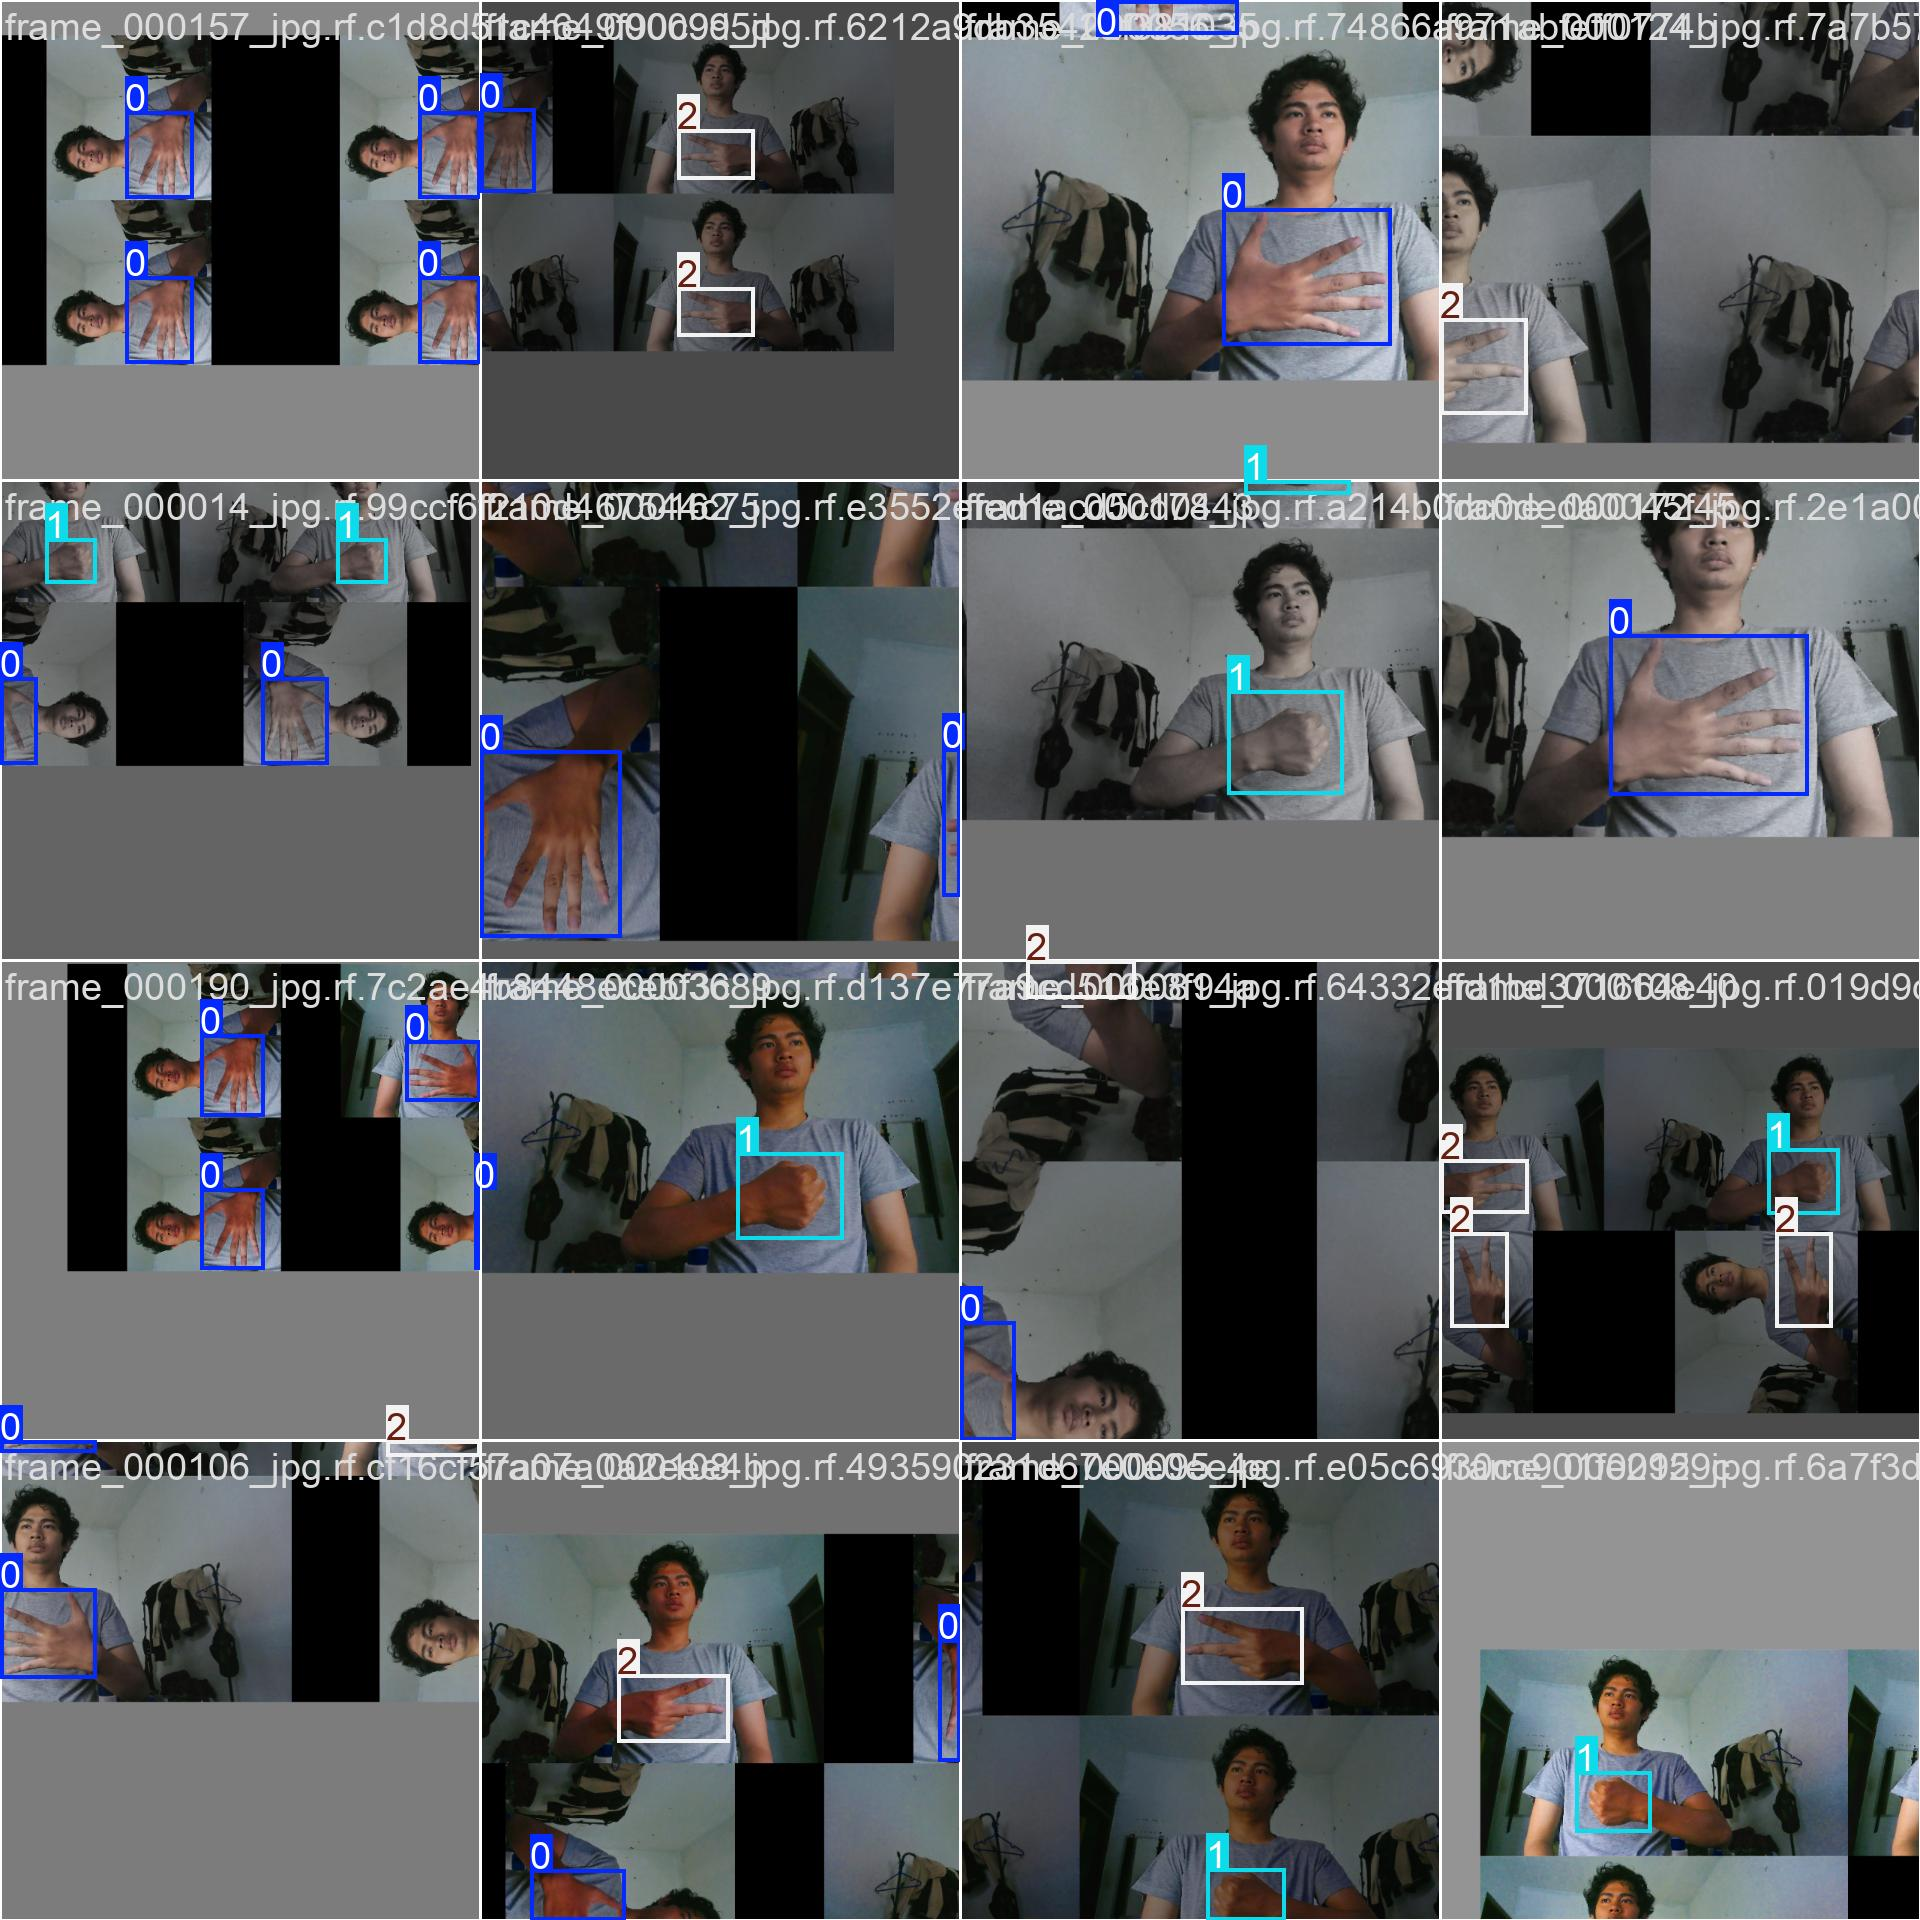

In [20]:
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg',width=1000)

In [27]:
ls ./runs/detect/train/weights

best.pt  last.pt


In [21]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>